# Credit card segmentation Project
Kevin Roderick Hartanto

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler,RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_curve, auc,roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.svm import SVC
from feature_engine.outliers import Winsorizer
import sklearn
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib as mpl
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelBinarizer
import pickle
import json

# Data Loading


In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           


Column name	                            Description

CLIENTNUM:Unique identifier for each customer. (Integer)

Attrition_Flag: flag indicating whether or not the customer has churned out. (Boolean)

Customer_Age: Age of customer. (Integer)

Gender	        Gender of customer. (String)

Dependent_count	Number of dependents that customer has. (Integer)

Education_Level	Education level of customer. (String)

Marital_Status	Marital status of customer. (String)

Income_Category	Income category of customer. (String)

Card_Category	Type of card held by customer. (String)

Months_on_book	How long customer has been on the books. (Integer)

Total_Relationship_Count	Total number of relationships customer has with the credit card provider. (Integer)

Months_Inactive_12_mon	Number of months customer has been inactive in the last twelve months. (Integer)

Contacts_Count_12_mon	Number of contacts customer has had in the last twelve months. (Integer)

Credit_Limit	Credit limit of customer. (Integer)

Total_Revolving_Bal	Total revolving balance of customer. (Integer)

Avg_Open_To_Buy	Average open to buy ratio of customer. (Integer)

Total_Amt_Chng_Q4_Q1	Total amount changed from quarter 4 to quarter 1. (Integer)

Total_Trans_Amt	Total transaction amount. (Integer)

Total_Trans_Ct	Total transaction count. (Integer)

Total_Ct_Chng_Q4_Q1	Total count changed from quarter 4 to quarter 1. (Integer)

Avg_Utilization_Ratio	Average utilization ratio of customer. (Integer)


In [4]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace = True)

In [7]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Churn", "Retaintion"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

In [10]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [11]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Cat Columns :  ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [89]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
channel = df[['CLIENTNUM', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Attrition_Flag']]
channel1 = channel.groupby([channel['Education_Level'], channel['Attrition_Flag']])['CLIENTNUM'].count().unstack(level=1).fillna(0)
channel_churn = (channel1.div(channel1.sum(axis=1), axis=0) * 100)#.sort_values(by=[0], ascending=False)

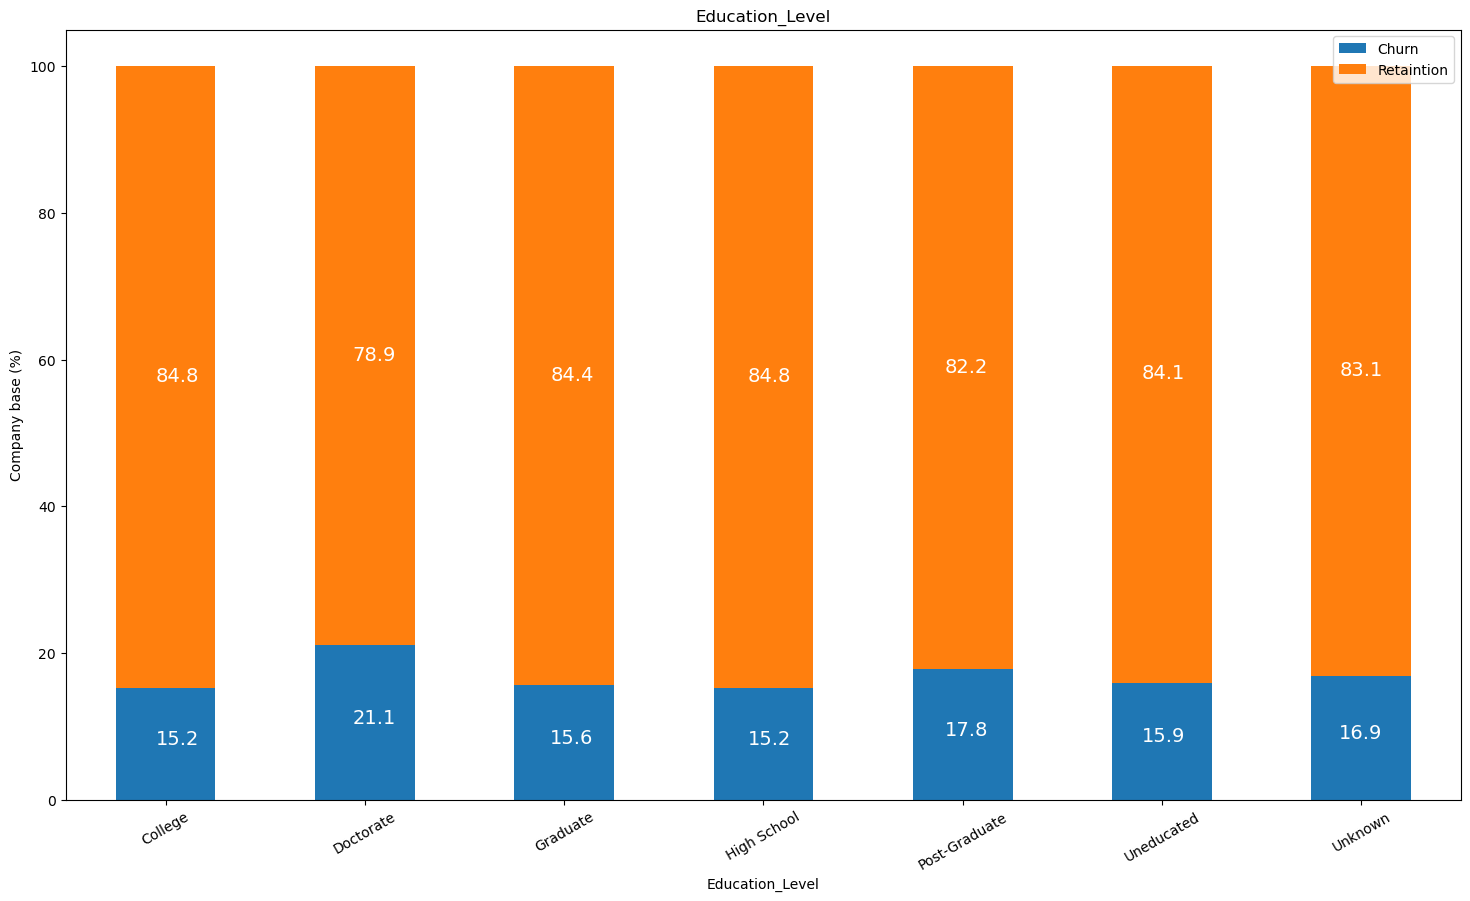

In [13]:
plot_stacked_bars(channel_churn, 'Education_Level', rot_=30)

In [14]:
channel2 = channel.groupby([channel['Card_Category'], channel['Attrition_Flag']])['CLIENTNUM'].count().unstack(level=1).fillna(0)
channel_churn = (channel2.div(channel2.sum(axis=1), axis=0) * 100)

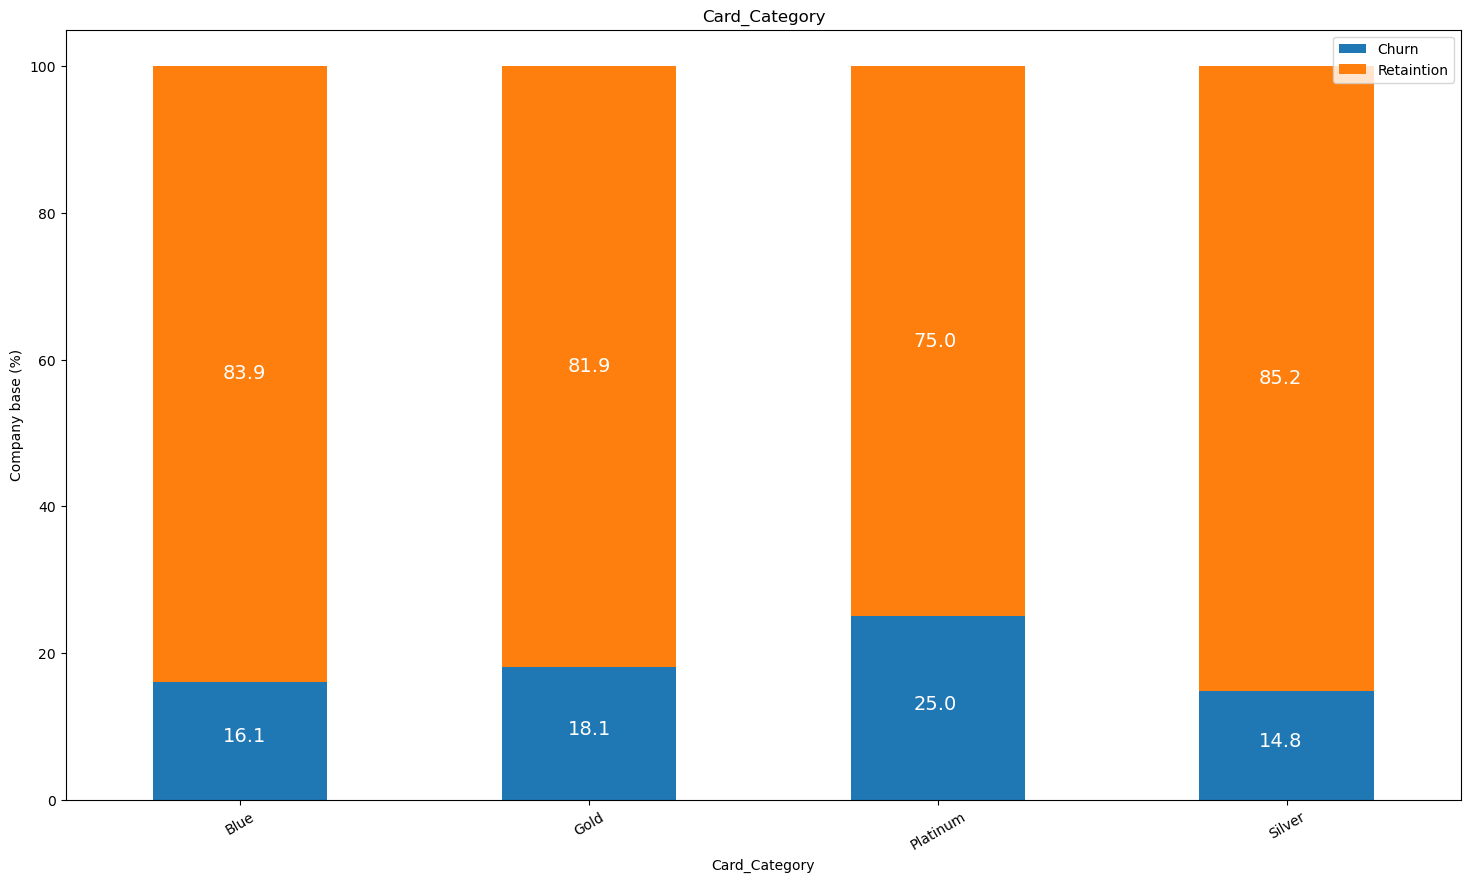

In [15]:
plot_stacked_bars(channel_churn, 'Card_Category', rot_=30)

In [16]:
channel3 = channel.groupby([channel['Income_Category'], channel['Attrition_Flag']])['CLIENTNUM'].count().unstack(level=1).fillna(0)
channel_churn = (channel3.div(channel3.sum(axis=1), axis=0) * 100)

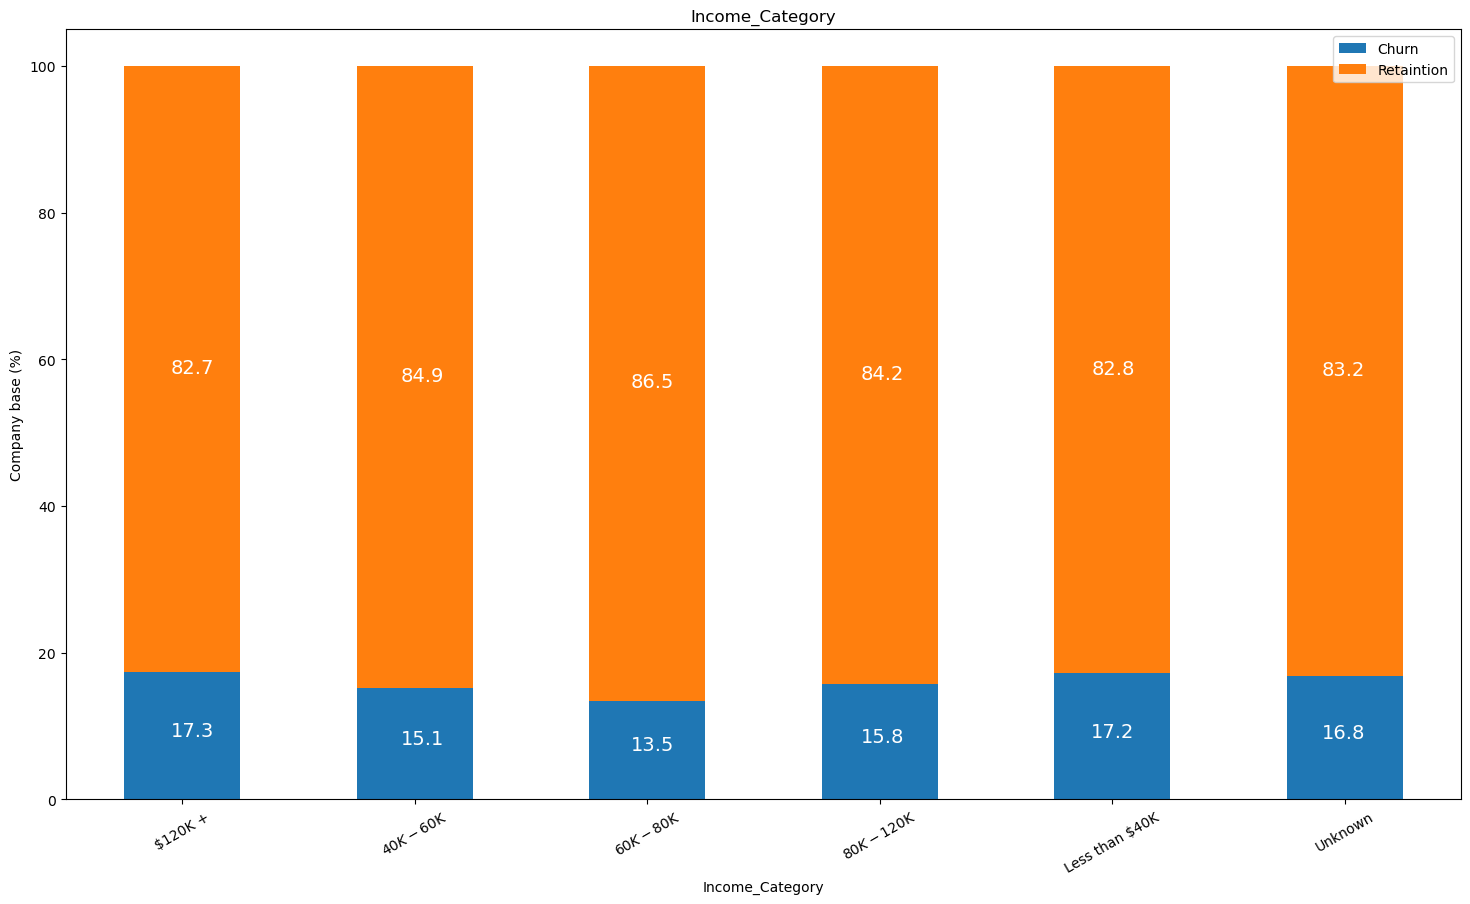

In [17]:
plot_stacked_bars(channel_churn, 'Income_Category', rot_=30)

In [18]:
channel

,CLIENTNUM,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,768805383,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,818770008,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,713982108,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,769911858,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,709106358,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer
...,...,...,...,...,...,...,...
10122,772366833,M,Graduate,Single,$40K - $60K,Blue,Existing Customer
10123,710638233,M,Unknown,Divorced,$40K - $60K,Blue,Attrited Customer
10124,716506083,F,High School,Married,Less than $40K,Blue,Attrited Customer
10125,717406983,M,Graduate,Unknown,$40K - $60K,Blue,Attrited Customer


In [19]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [20]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [21]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

C:\Users\kevin\AppData\Local\Temp\ipykernel_25112\3480635041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = df.corr()


<Axes: >

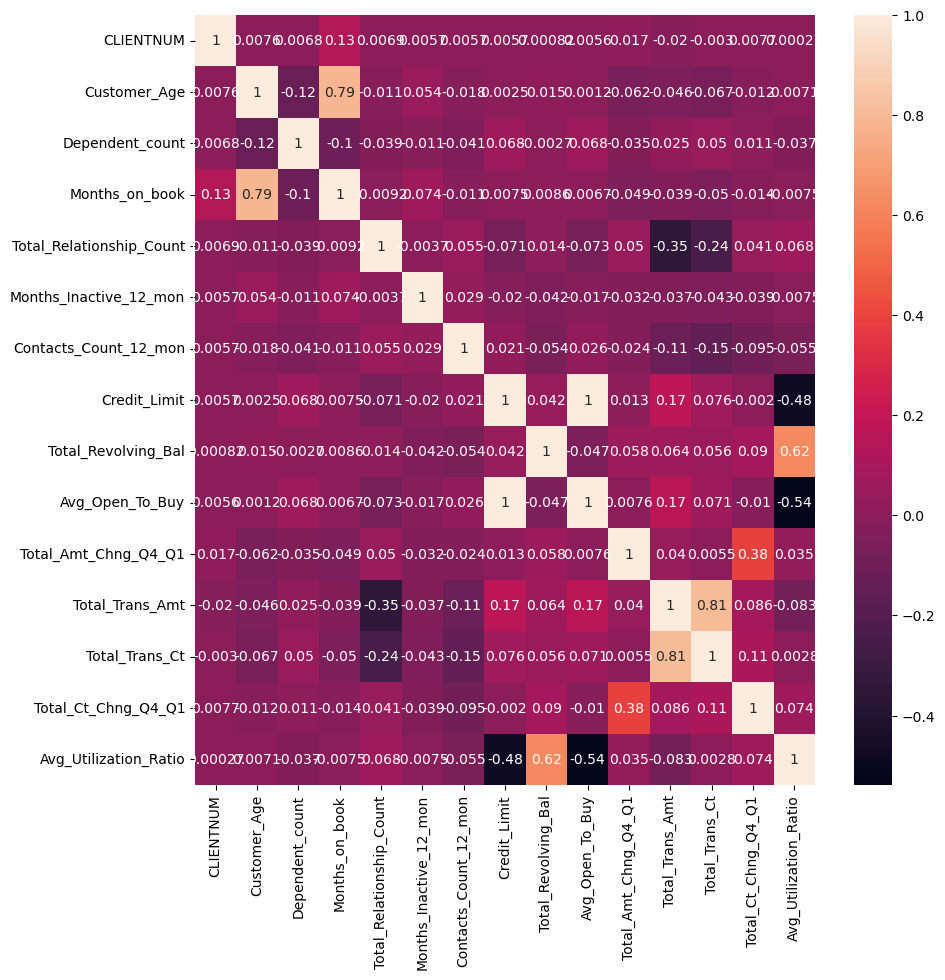

In [22]:
corre = df.corr()
round(corre,4)#menujukan correlasi antara column
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corre, annot=True, ax =ax)# mengubah data yang tadi menjadi heatmap

In [23]:
df['Education_Level'].nunique()


7

In [24]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


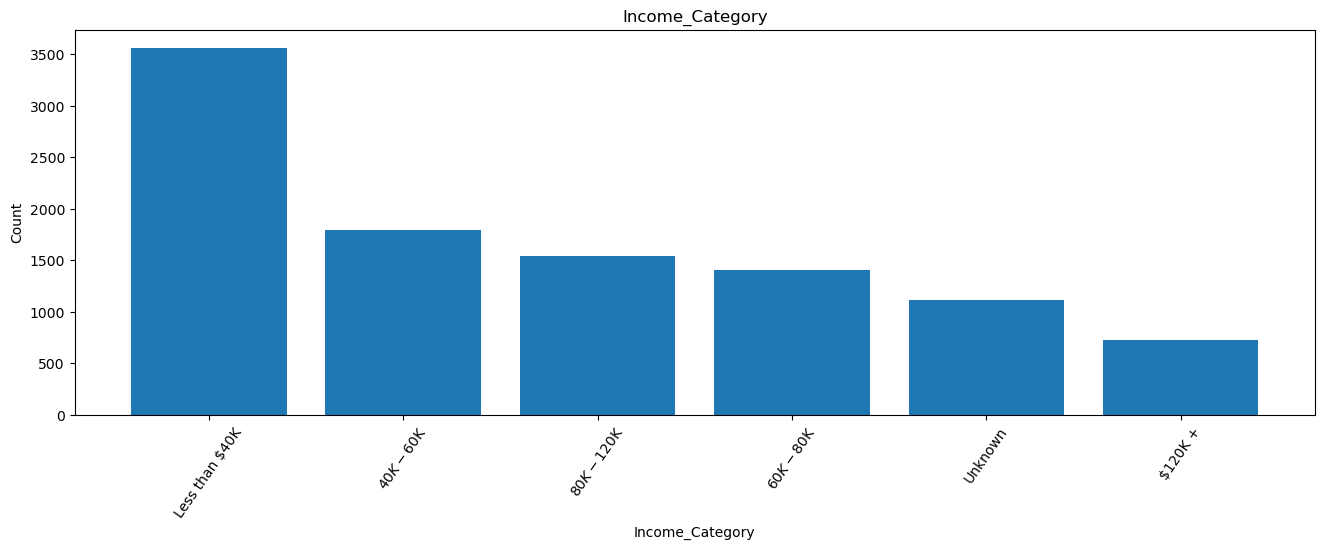

In [26]:
vc = df['Income_Category'].value_counts()
plt.figure(figsize=(16, 5))
plt.bar(vc.index, vc.values)
plt.xlabel('Income_Category')
plt.ylabel('Count')
plt.xticks(rotation = 55)
plt.title('Income_Category')
plt.show()

In [27]:
dfg = df.groupby("Income_Category")["Card_Category","Attrition_Flag"].value_counts().unstack().fillna(0)

C:\Users\kevin\AppData\Local\Temp\ipykernel_25112\2574969506.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df.groupby("Income_Category")["Card_Category","Attrition_Flag"].value_counts().unstack().fillna(0)


In [28]:
dfg

Attrition_Flag                 Attrited Customer  Existing Customer
Income_Category Card_Category                                      
$120K +         Blue                       113.0              532.0
                Gold                         2.0               16.0
                Platinum                     0.0                4.0
                Silver                      11.0               49.0
$40K - $60K     Blue                       257.0             1418.0
                Gold                         2.0               13.0
                Platinum                     1.0                0.0
                Silver                      11.0               88.0
$60K - $80K     Blue                       172.0             1101.0
                Gold                         6.0               23.0
                Platinum                     0.0                4.0
                Silver                      11.0               85.0
$80K - $120K    Blue                       215.0             1180.0
                Gold                         5.0               16.0
                Platinum                     0.0                2.0
                Silver                      22.0               95.0
Less than $40K  Blue                       586.0             2817.0
                Gold                         4.0               20.0
                Platinum                     2.0                2.0
                Silver                      20.0              110.0
Unknown         Blue                       176.0              869.0
                Gold                         2.0                7.0
                Platinum                     2.0                3.0
                Silver                       7.0               46.0

In [29]:
#dtest = df[["Income_Category","Card_Category","Attrition_Flag"]]

<Axes: xlabel='Income_Category,Card_Category'>

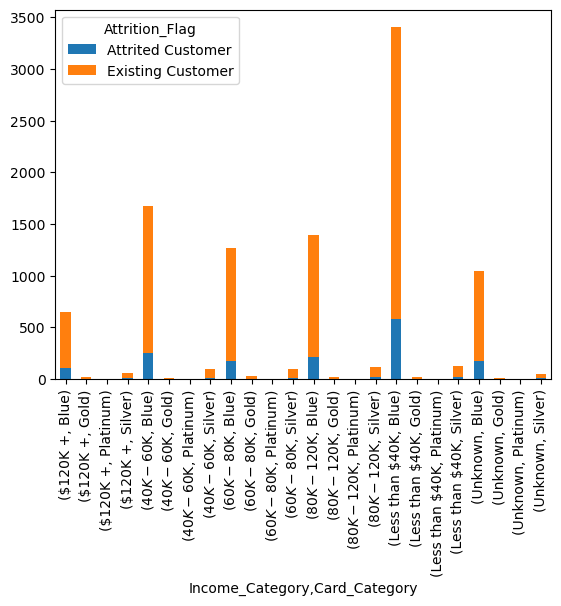

In [30]:

dfg.plot.bar(stacked=True, )

In [31]:
num_columns

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [32]:
df.groupby("Attrition_Flag")["Total_Revolving_Bal"].mean()

Attrition_Flag
Attrited Customer     672.822987
Existing Customer    1256.604118
Name: Total_Revolving_Bal, dtype: float64

In [33]:
df.groupby("Attrition_Flag")["Total_Trans_Amt"].median()

Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64

In [34]:
df.groupby("Attrition_Flag")["Avg_Utilization_Ratio"].mean()

Attrition_Flag
Attrited Customer    0.162475
Existing Customer    0.296412
Name: Avg_Utilization_Ratio, dtype: float64

In [35]:
'''fig, ax = plt.subplots(figsize = (12,6))
ax.bar(dfg.index, dfg["Attrited Customer"], label = "No", width = 0.3) 
ax.bar(dfg.index, dfg["Existing Customer"], bottom = dfg.No, label = "Yes", width = 0.3) '''
#ax.bar(df.index, df["Yes"], bottom = df.No, label = "Yes", width = 0.3)

'fig, ax = plt.subplots(figsize = (12,6))\nax.bar(dfg.index, dfg["Attrited Customer"], label = "No", width = 0.3) \nax.bar(dfg.index, dfg["Existing Customer"], bottom = dfg.No, label = "Yes", width = 0.3) '

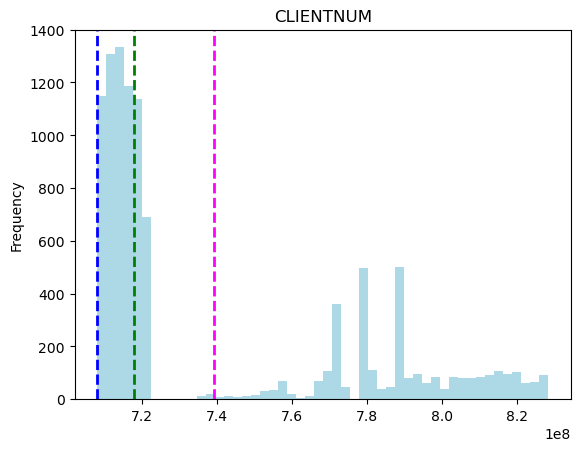

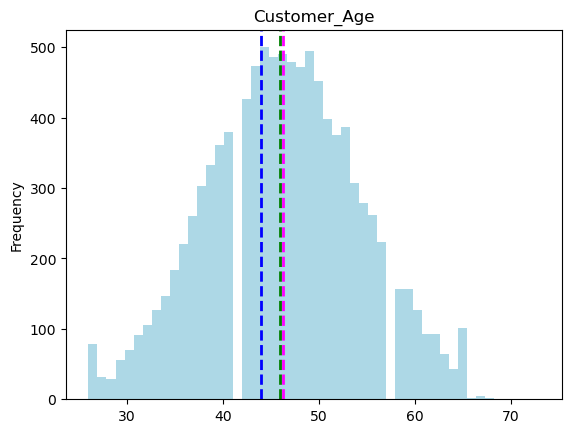

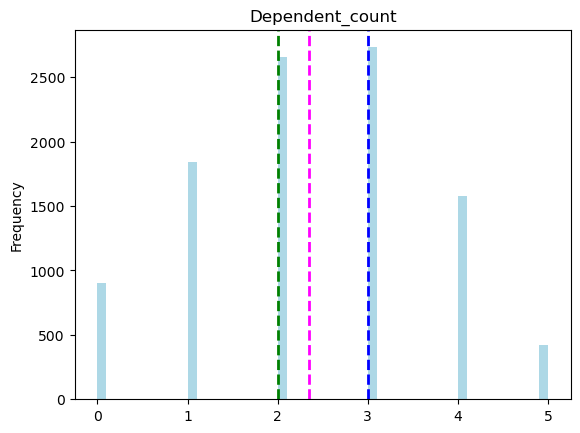

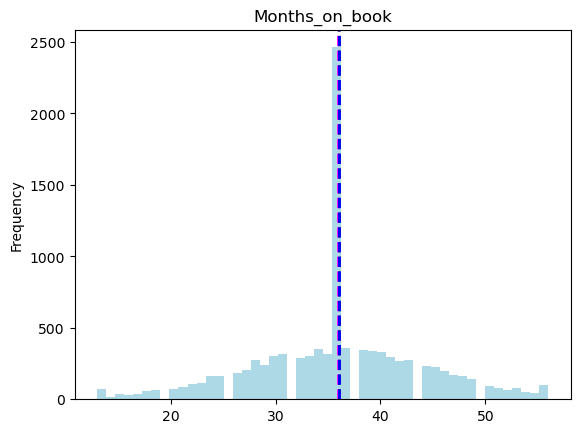

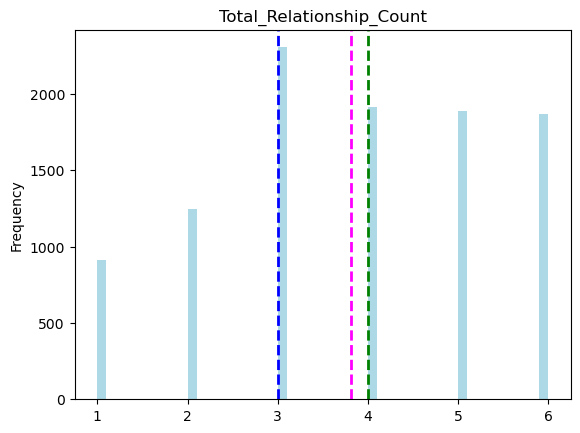

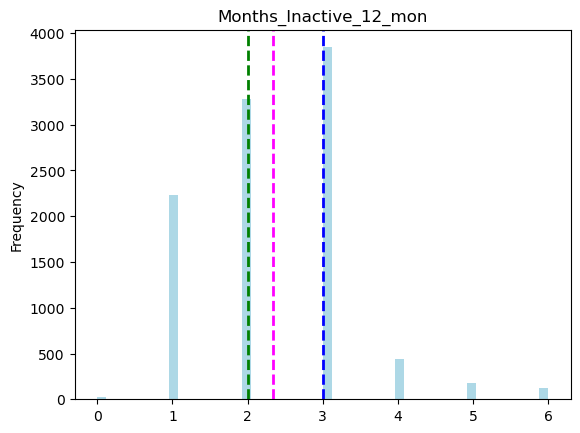

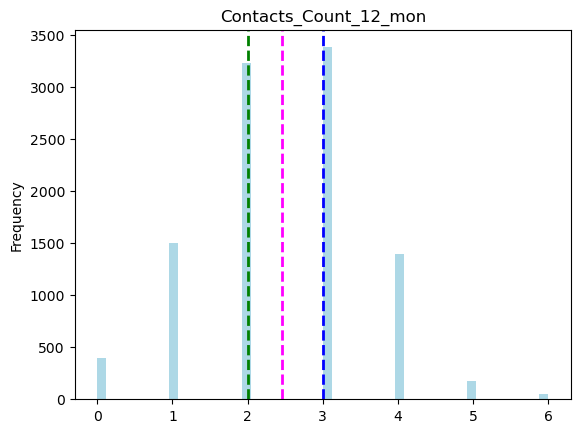

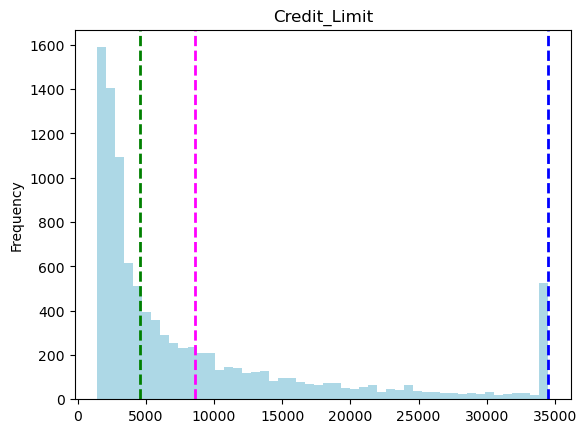

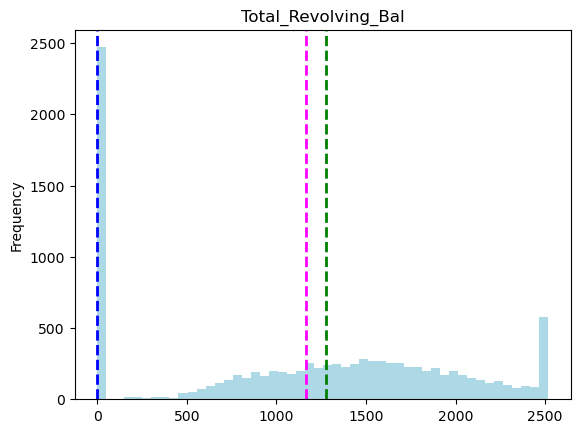

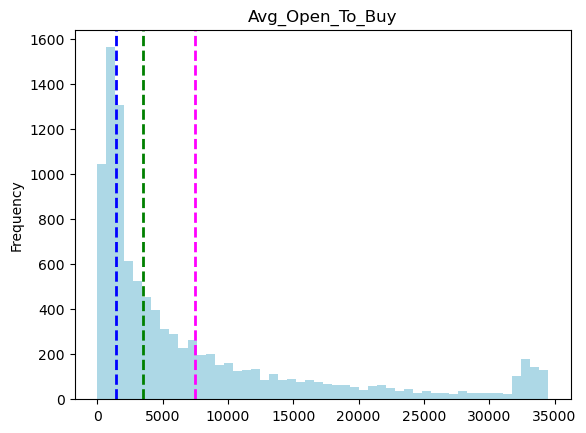

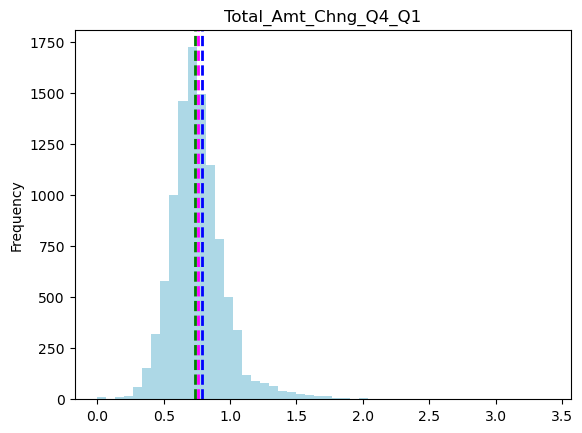

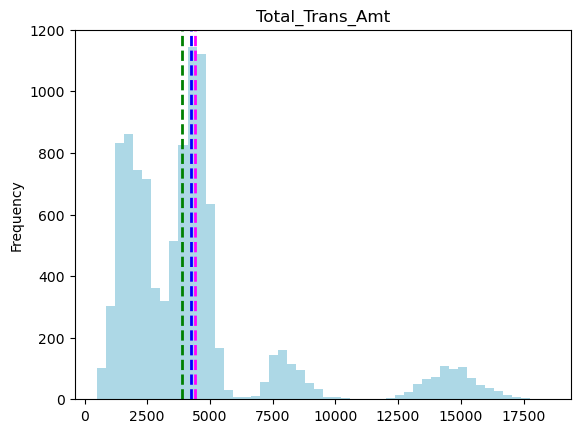

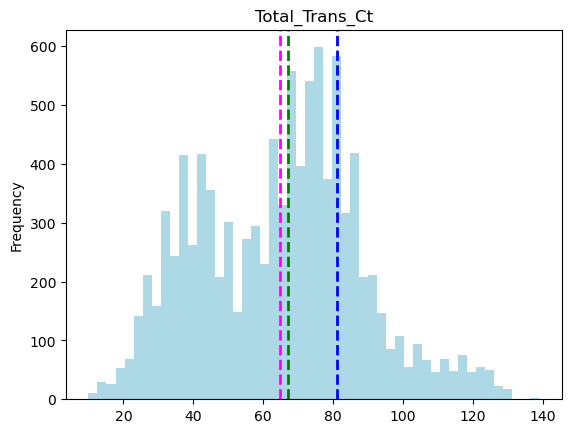

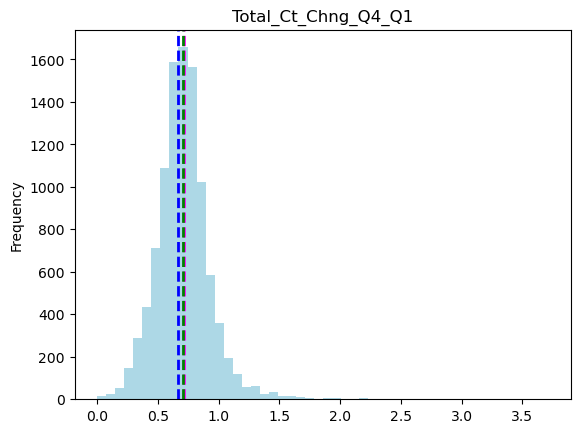

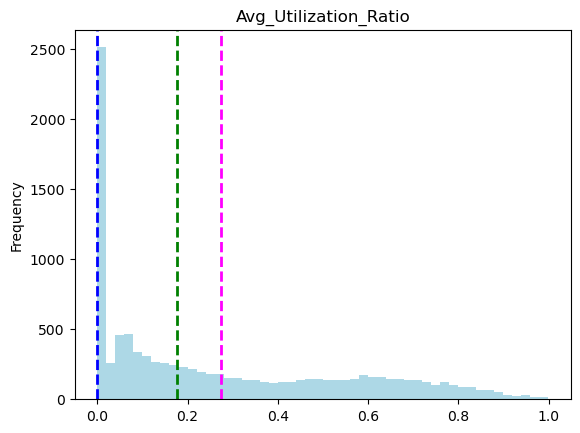

In [36]:
for i in num_columns:
    vol = df[i]#df point in wallet 
    vol.plot.hist(title=i, color='lightblue', bins=50)  
    plt.axvline(vol.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(vol.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(vol.mode()[0], color='blue', linestyle='dashed', linewidth=2)
    plt.show()#menujukan median, rata-rata dan modus dari points_in_wallet.

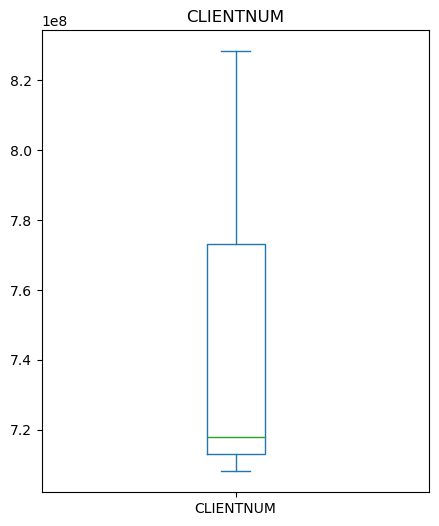

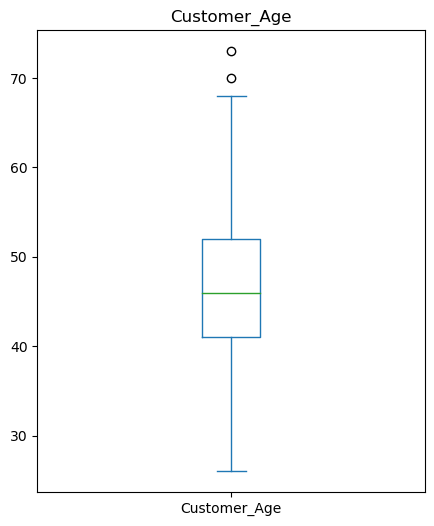

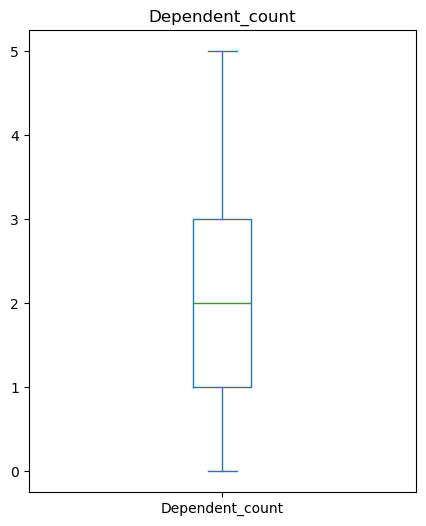

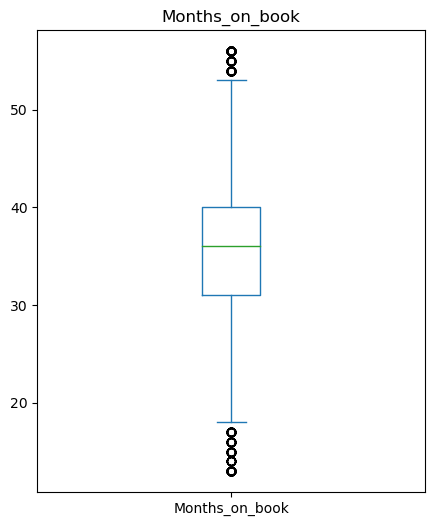

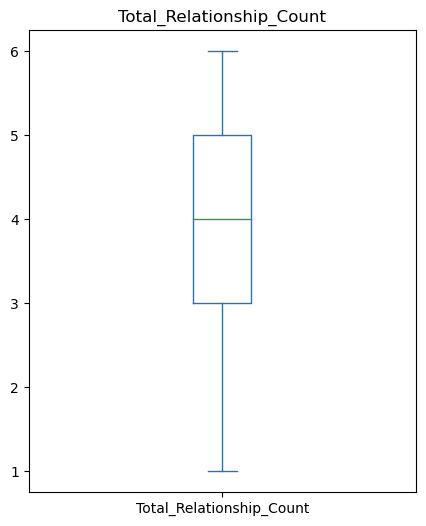

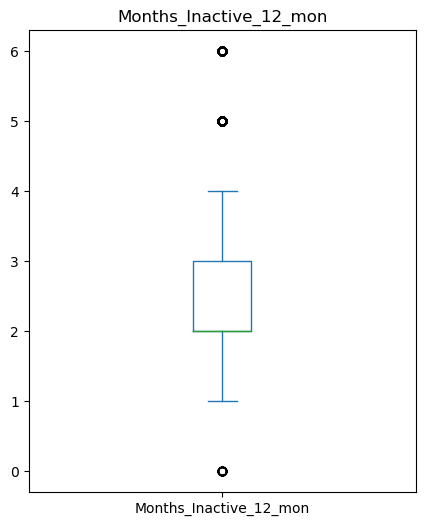

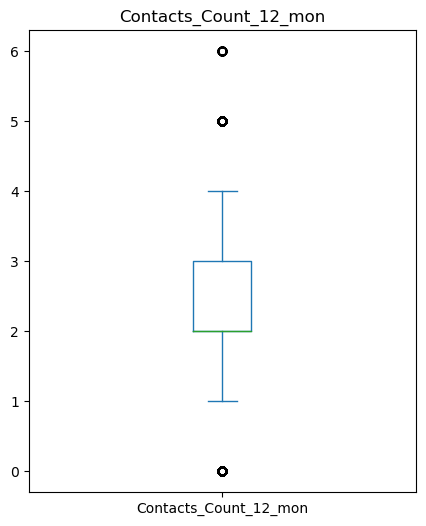

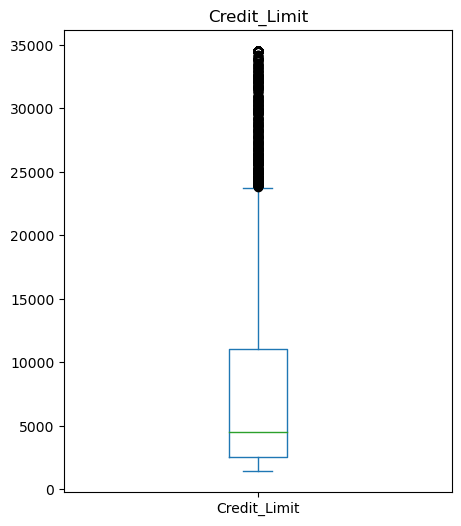

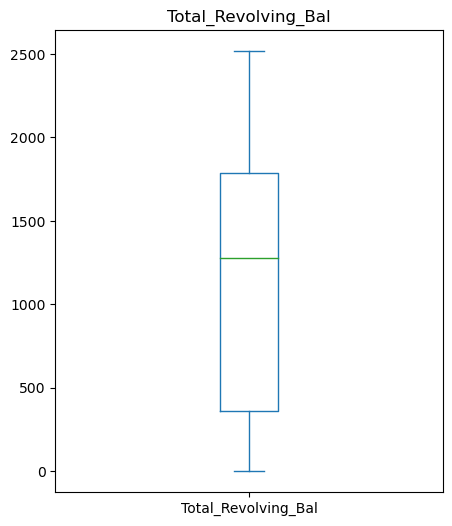

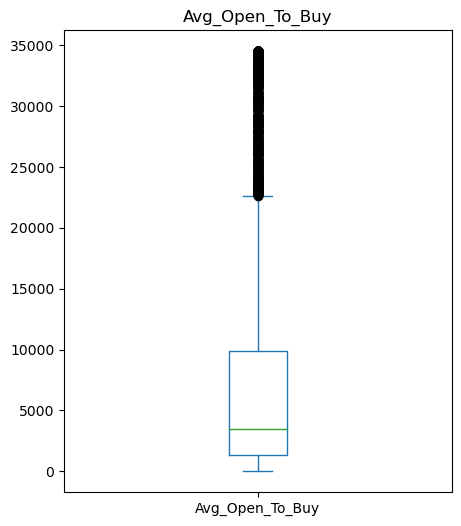

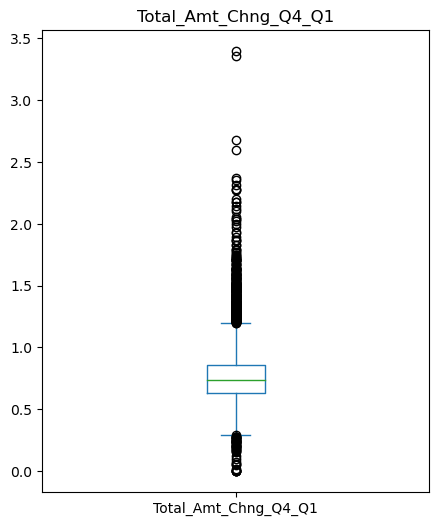

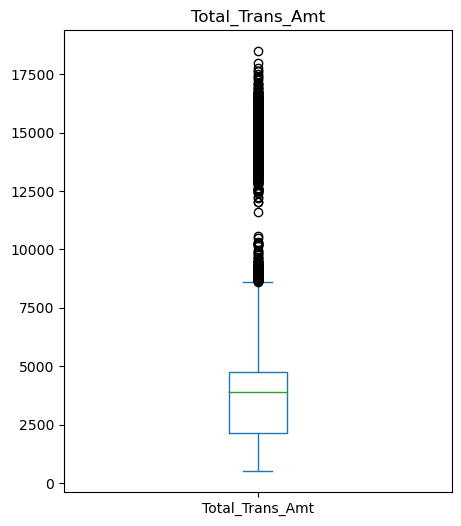

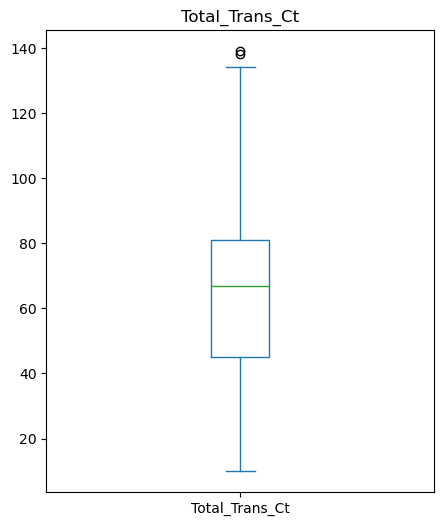

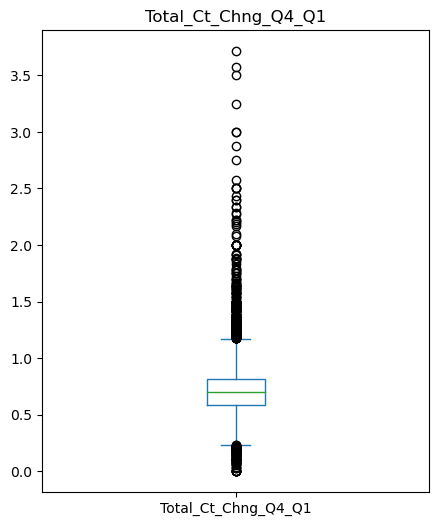

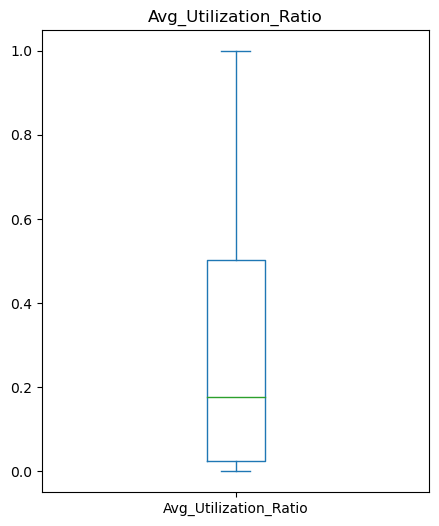

In [37]:
for i in num_columns:
    #vol = df[i]#df point in wallet 
    df[i].plot(kind='box', title=i, figsize=(5,6))
    plt.show()#menujukan median, rata-rata dan modus dari points_in_wallet.


In [38]:
#df['City'].value_counts().value_counts()

In [39]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

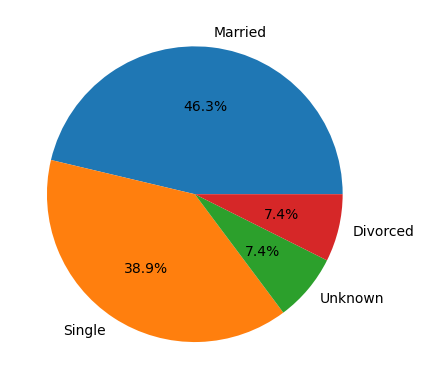

In [40]:
keys = ['Married', 'Single','Unknown','Divorced']
plt.pie(df['Marital_Status'].value_counts(),autopct='%.1f%%',labels= keys)#autopct itu untuk angka presentasinya
plt.show()

In [41]:
#sns.pairplot(df)

# Data engineering 

In [42]:
# Splitting between `X` and `y`
X = df.drop(['Attrition_Flag','CLIENTNUM',], axis=1)
#X = df.drop(['price'], axis=1)
y = df['Attrition_Flag']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)#split

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)# melihat dimensi test dan train

Train Size :  (8101, 19)
Test Size :  (2026, 19)


In [44]:
def censor(X,methode,vari):
    windsoriser = Winsorizer(capping_method= methode, # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=vari)

    windsoriser.fit(X)

    return windsoriser.transform(X)

In [45]:
num_columns

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [46]:
X_train = censor(X_train,'iqr',['Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit', 
 'Months_on_book',])# melakukan penutupan outlire dengan censoring
#X_test = literally_1984(X_test,'iqr',['ssc_p' ,'hsc_p','degree_p','etest_p','mba_p' ])# melakukan penutupan outlire dengan censoring

In [47]:
X_train.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [48]:
X_train=X_train.drop(['Months_on_book','Avg_Open_To_Buy','Total_Trans_Ct'],axis=1)
X_test=X_test.drop(['Months_on_book','Avg_Open_To_Buy','Total_Trans_Ct'],axis=1)

# Model Definition

In [49]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Cat Columns :  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [50]:
X_train_num = X_train[num_columns]#split numeric dan column
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [51]:
scaler = StandardScaler()#mengunakan minmaxscaler karena distribusi data tidak normal
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled.shape

(8101, 11)

In [52]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train_cat)# Ordinal encoder digunakan karena angkanya memiliki rank semua
feature_names = encoder.get_feature_names_out().tolist()
X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.fit_transform(X_test_cat).toarray()

In [53]:
X_train_cat_encoded.shape

(8101, 23)

In [54]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)#melakuakn concatenate balik
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final.shape

(8101, 34)

In [55]:
smote = SMOTE(random_state = 11)
X_train_final, y_train = smote.fit_resample(X_train_final, y_train)

In [56]:
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + feature_names])
X_test_final_df.shape

(2026, 34)

In [57]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + feature_names])
X_train_final_df

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.459251,-1.813600,0.763365,-1.415799,1.505415,-0.085958,1.164169,1.813187,-0.892251,2.101214,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0,0.0,0.0
1,0.209334,0.508018,-1.175807,-0.341484,-1.416564,-0.797466,-0.111744,-1.294648,0.418027,1.893170,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0,0.0,0.0
2,-0.040583,2.055764,-1.822197,0.732831,-0.442571,-0.546713,0.638576,-0.630627,0.142253,0.132403,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
3,-0.790336,-0.265855,0.763365,0.732831,-1.903560,2.200833,1.252587,-0.070019,-0.136788,-0.354726,...,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
4,1.583880,-0.265855,-1.175807,1.807146,-0.442571,-0.226513,-1.428182,0.267434,2.031609,1.649606,...,0.0,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,1.111539,0.508018,0.692253,0.732831,1.398262,-0.745540,1.013256,-0.079209,-0.635950,-0.212954,...,0.0,0.889987,0.0,0.000000,0.110013,0.000000,1.0,0.0,0.0,0.0
13608,-1.065218,-0.691443,-1.175807,0.249331,-0.442571,-0.788729,-1.118874,-0.766925,-0.634687,-1.599728,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0,0.0,0.0
13609,0.029424,-0.314028,-1.135569,0.732831,-0.381941,0.309846,-1.428182,-1.580285,-1.016632,-0.551888,...,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
13610,0.429103,1.188535,-1.097830,0.732831,-0.560068,-0.671815,1.474013,-1.699747,-0.959686,-1.802274,...,0.0,0.000000,0.0,0.000000,0.879365,0.120635,1.0,0.0,0.0,0.0


# Model Training

In [58]:
model_SVC = SVC(kernel='rbf')
model_SVC.fit(X_train_final, y_train)
y_pred_svc_train = model_SVC.predict(X_train_final_df)
y_pred_svc_test = model_SVC.predict(X_test_final)

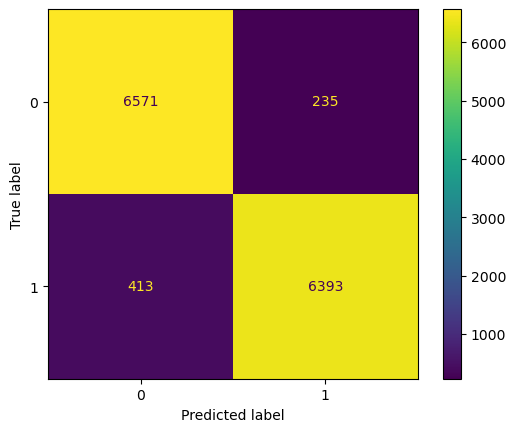

In [59]:
cm_train_log_reg = confusion_matrix(y_train, y_pred_svc_train)
ConfusionMatrixDisplay(cm_train_log_reg).plot()

In [60]:
'''y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)'''

'y_pred_train = pipe.predict(X_train)\ny_pred_test = pipe.predict(X_test)'

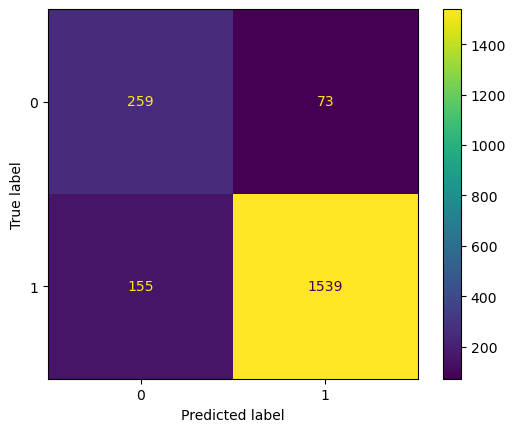

In [61]:
cm_train_log_reg = confusion_matrix(y_test, y_pred_svc_test)
ConfusionMatrixDisplay(cm_train_log_reg).plot()
#0 = not placed 1 = Placed

In [62]:
'''cm_train_log_reg = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_train_log_reg).plot()'''

'cm_train_log_reg = confusion_matrix(y_test, y_pred_test)\nConfusionMatrixDisplay(cm_train_log_reg).plot()'

In [63]:
model_rand = RandomForestClassifier(max_depth=15,criterion='entropy')
model_rand.fit(X_train_final, y_train)
y_pred_rand_train = model_rand.predict(X_train_final_df)
y_pred_rand_test = model_rand.predict(X_test_final)

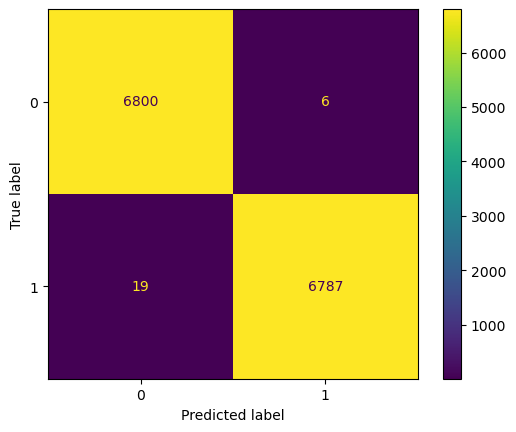

In [64]:

cm_train_log_reg = confusion_matrix(y_train, y_pred_rand_train)
ConfusionMatrixDisplay(cm_train_log_reg).plot()

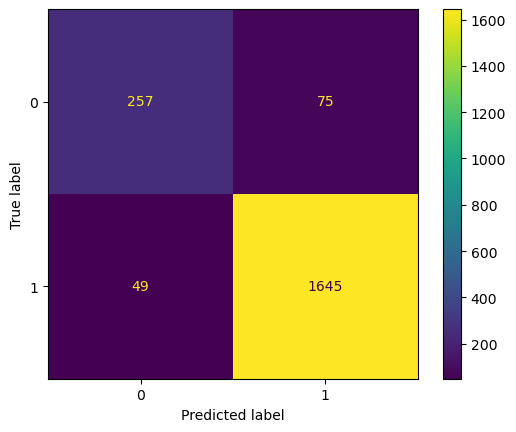

In [65]:
cm_train_log_reg = confusion_matrix(y_test, y_pred_rand_test)
ConfusionMatrixDisplay(cm_train_log_reg).plot()

In [66]:
model_tree = DecisionTreeClassifier(criterion='entropy',)
model_tree.fit(X_train_final, y_train)
y_pred_tree_train = model_tree.predict(X_train_final)
y_pred_tree_test = model_tree.predict(X_test_final)

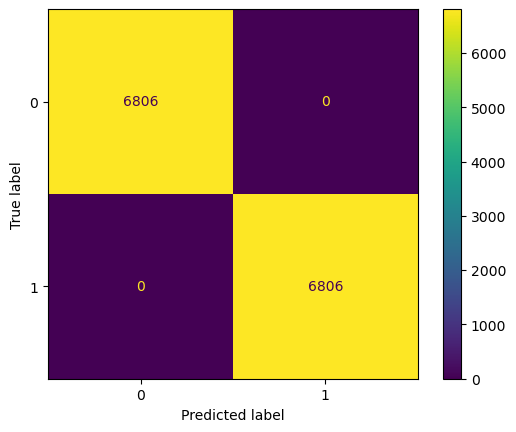

In [67]:
cm_train_log_reg = confusion_matrix(y_train, y_pred_tree_train)
ConfusionMatrixDisplay(cm_train_log_reg).plot()

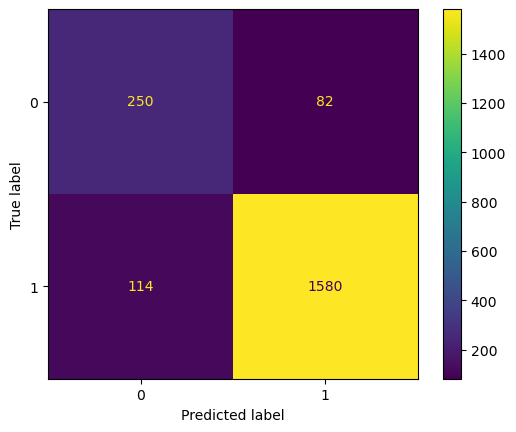

In [68]:
cm_train_log_reg = confusion_matrix(y_test, y_pred_tree_test)
ConfusionMatrixDisplay(cm_train_log_reg).plot()

# Model Evaluation

In [69]:
def crossval(model,X,y,c=5,score ='f1'):
    f1_score_train_cross_val = cross_val_score(model,
                                           X,
                                           y,
                                           cv=c,
                                           scoring=score)

    print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
    print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
    print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
    print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

## RandomForest 

In [70]:
label_binarizer = LabelBinarizer().fit(y_pred_rand_test)
y_onehot_test = label_binarizer.transform(y_pred_rand_test)
y_lab_test = label_binarizer.transform(y_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_onehot_test)
print(ns_auc)
print(lr_auc)

0.5
0.8725853828537289


In [71]:
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_rand_test, pos_label="Existing Customer"), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_rand_test), '\n')

F1 Score - Test Set   :  0.9636789689513766 

Classification Report : 
                    precision    recall  f1-score   support

Attrited Customer       0.84      0.77      0.81       332
Existing Customer       0.96      0.97      0.96      1694

         accuracy                           0.94      2026
        macro avg       0.90      0.87      0.88      2026
     weighted avg       0.94      0.94      0.94      2026
 



In [72]:
label_binarizer2 = LabelBinarizer().fit(y_train)
y_onehot_train = label_binarizer2.transform(y_train)
crossval(model_rand,X_train_final,y_onehot_train)

c:\Users\kevin\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

F1 Score - All - Cross Validation  :  [0.91574586 0.9833395  0.9802754  0.98096305 0.98402081]
F1 Score - Mean - Cross Validation :  0.9688689232671788
F1 Score - Std - Cross Validation  :  0.026598545570543645
F1 Score - Range of Test-Set       :  0.9422703776966351 - 0.9954674688377224


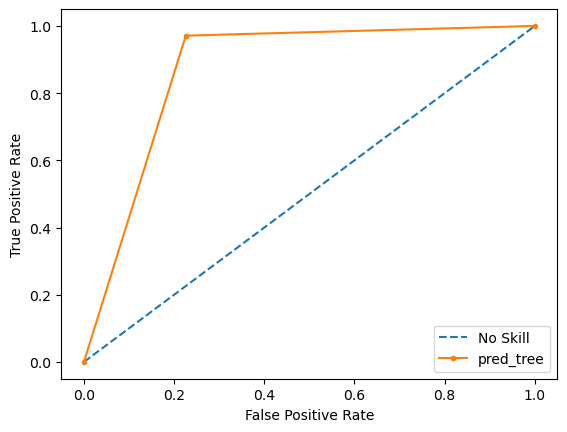

In [73]:
ns_fpr, ns_tpr, _ = roc_curve(y_lab_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_lab_test, y_onehot_test)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='pred_tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## SVC

In [74]:
label_binarizer = LabelBinarizer().fit(y_pred_svc_test)
y_onehot_test = label_binarizer.transform(y_pred_svc_test)
y_lab_test = label_binarizer.transform(y_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_onehot_test)
print(ns_auc)
print(lr_auc)

0.5
0.8443105361232416


In [75]:
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_svc_test, pos_label="Existing Customer"), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_svc_test), '\n')

F1 Score - Test Set   :  0.9310344827586207 

Classification Report : 
                    precision    recall  f1-score   support

Attrited Customer       0.63      0.78      0.69       332
Existing Customer       0.95      0.91      0.93      1694

         accuracy                           0.89      2026
        macro avg       0.79      0.84      0.81      2026
     weighted avg       0.90      0.89      0.89      2026
 



In [76]:
label_binarizer2 = LabelBinarizer().fit(y_train)
y_onehot_train = label_binarizer2.transform(y_train)
crossval(model_SVC,X_train_final,y_onehot_train)

c:\Users\kevin\miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

F1 Score - All - Cross Validation  :  [0.91094891 0.93547184 0.93278258 0.9391435  0.9338843 ]
F1 Score - Mean - Cross Validation :  0.9304462237330551
F1 Score - Std - Cross Validation  :  0.009983223612860106
F1 Score - Range of Test-Set       :  0.920463000120195 - 0.9404294473459152


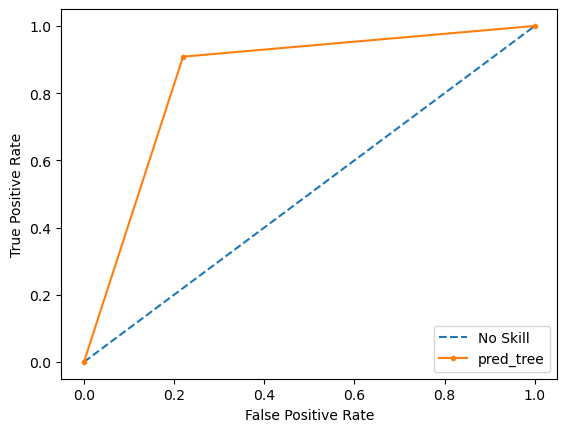

In [77]:
ns_fpr, ns_tpr, _ = roc_curve(y_lab_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_lab_test, y_onehot_test)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='pred_tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## RandomTree Classifire

In [78]:
label_binarizer = LabelBinarizer().fit(y_pred_tree_test)
y_onehot_test = label_binarizer.transform(y_pred_tree_test)
y_lab_test = label_binarizer.transform(y_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_onehot_test)
print(ns_auc)
print(lr_auc)

0.5
0.8428578540845792


In [90]:
y_pred_tree_test

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Attrited Customer'],
      dtype=object)

In [79]:
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_tree_test, pos_label="Existing Customer"), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_tree_test), '\n')

F1 Score - Test Set   :  0.9415971394517282 

Classification Report : 
                    precision    recall  f1-score   support

Attrited Customer       0.69      0.75      0.72       332
Existing Customer       0.95      0.93      0.94      1694

         accuracy                           0.90      2026
        macro avg       0.82      0.84      0.83      2026
     weighted avg       0.91      0.90      0.91      2026
 



In [80]:
label_binarizer2 = LabelBinarizer().fit(y_train)
y_onehot_train = label_binarizer2.transform(y_train)
crossval(model_tree,X_train_final,y_onehot_train)

F1 Score - All - Cross Validation  :  [0.9029745  0.95245171 0.94823706 0.94964565 0.93705773]
F1 Score - Mean - Cross Validation :  0.9380733310012989
F1 Score - Std - Cross Validation  :  0.018313475265959257
F1 Score - Range of Test-Set       :  0.9197598557353396 - 0.9563868062672581


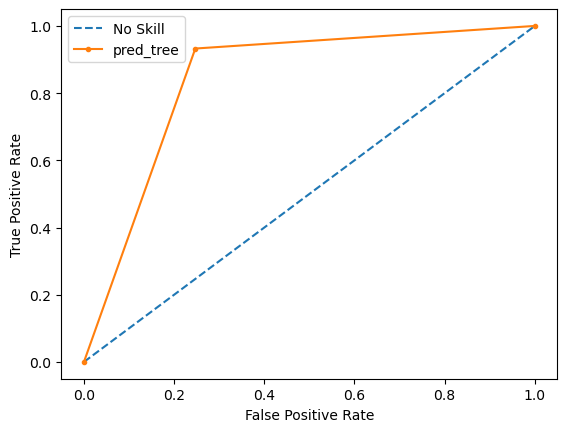

In [81]:
ns_fpr, ns_tpr, _ = roc_curve(y_lab_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_lab_test, y_onehot_test)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='pred_tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Hyperparameter tuneing

In [82]:
n_estimators = [int(x) for x in np.linspace(start=1, stop=1000, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 500, 20)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [83]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_grid,
                                 n_iter=20,
                                 cv=5,
                                 random_state=17,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train_final, y_train)

c:\Users\kevin\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
c:\Users\kevin\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 27, 53, 79, 106, 132,
                                                      158, 184, 211, 237, 263,
                                                      289, 316, 342, 368, 394,
                                                      421, 447, 473, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [1, 72, 143, 215, 286,
                                                         357, 429, 500, 571,
                                                         643, 714, 785, 857,
                                                         928, 1000]},
                   random_state=17, scoring='f1')

In [84]:
rf_randomcv.best_params_

{'n_estimators': 215,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 316,
 'criterion': 'entropy'}

In [85]:
rf_randomcv_best = rf_randomcv.best_estimator_

F1 Score - Test Set   :  0.9624192601291839 

Classification Report : 
                    precision    recall  f1-score   support

Attrited Customer       0.82      0.78      0.80       332
Existing Customer       0.96      0.97      0.96      1694

         accuracy                           0.94      2026
        macro avg       0.89      0.87      0.88      2026
     weighted avg       0.94      0.94      0.94      2026
 

Confusion Matrix      : 


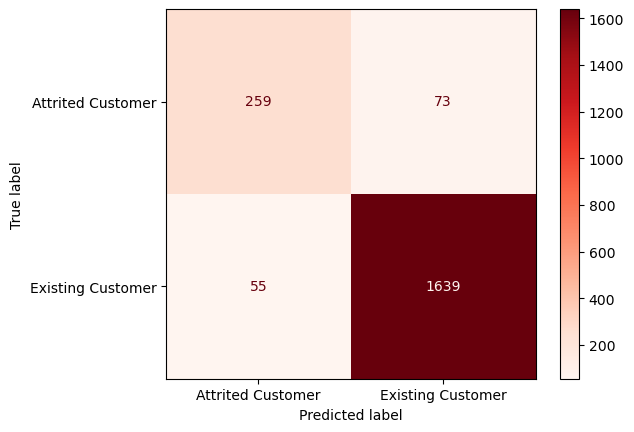

In [86]:
y_pred_test = rf_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test,pos_label="Existing Customer"), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test,), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test, cmap='Reds'))

# Model saving

In [87]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('rf_randomcv_best.pkl', 'wb') as file_5:
  pickle.dump(rf_randomcv_best, file_5)



# Conclusion

After a bit of exporlation on the data we have found several key point to be discuss further:

1. Most customer that churn have less revolving balance then the one who didn't
2. People with the highest income and the lowest income are the one that are more likely to churn
3. from what we see the people who are likely to churn are the one who has no use or little use for credit cards in general

I would reccomend a way to give the user more insentive for the user to use credit card such as a special discount for credit card user, so a collaberation with retail store or even online store might lessen the burden of churning customer 

In conclusion we can see the best model for this project would be the RandomForestClassifier, with high recall and accuracy skill, the result are also confident with the result of the model, we can then use this model to predict which customer are more likely to churn and presentr them with bonuses or discout for the payment to make sure they are less likely to churn.